Install Arch

In [ ]:
pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 903 kB 25.7 MB/s 


Importing 

In [ ]:
from random import gauss
from random import seed
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import pandas as pd

Reading data

In [ ]:
df = pd.read_csv('/content/Electric_Production (2).csv',index_col=0, parse_dates=True)
Xt = df.values


In [ ]:
df.values

array([[ 72.5052],
       [ 70.672 ],
       [ 62.4502],
       [ 57.4714],
       [ 55.3151],
       [ 58.0904],
       [ 62.6202],
       [ 63.2485],
       [ 60.5846],
       [ 56.3154],
       [ 58.0005],
       [ 68.7145],
       [ 73.3057],
       [ 67.9869],
       [ 62.2221],
       [ 57.0329],
       [ 55.8137],
       [ 59.9005],
       [ 65.7655],
       [ 64.4816],
       [ 61.0005],
       [ 57.5322],
       [ 59.3417],
       [ 68.1354],
       [ 73.8152],
       [ 70.062 ],
       [ 65.61  ],
       [ 60.1586],
       [ 58.8734],
       [ 63.8918],
       [ 68.8694],
       [ 70.0669],
       [ 64.1151],
       [ 60.3789],
       [ 62.4643],
       [ 70.5777],
       [ 79.8703],
       [ 76.1622],
       [ 70.2928],
       [ 63.2384],
       [ 61.4065],
       [ 67.1097],
       [ 72.9816],
       [ 75.7655],
       [ 67.5152],
       [ 63.2832],
       [ 65.1078],
       [ 73.8631],
       [ 77.9188],
       [ 76.6822],
       [ 73.3523],
       [ 65.1081],
       [ 63.

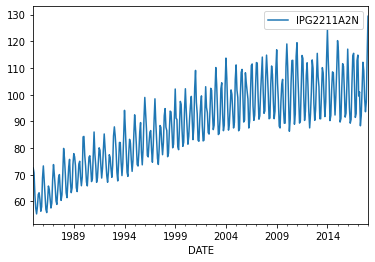

In [ ]:
df.plot()

Text(0.5, 1.0, 'Simulated GARCH(3,3) Data')

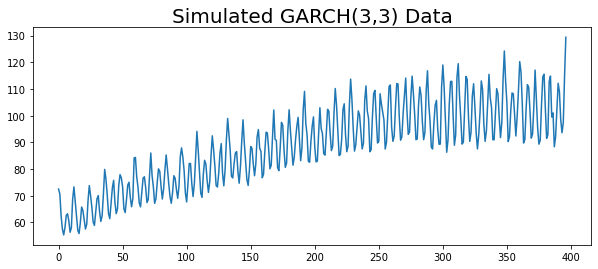

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(Xt)
plt.title('Simulated GARCH(3,3) Data',fontsize=20)

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(Xt)
plt.title('Simulated GARCH(3,3) Data',fontsize=20)

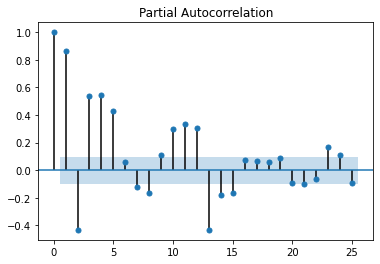

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

pacf = plot_pacf(df['IPG2211A2N'],lags=25)

In [ ]:
model=arch_model(Xt,p=3,q=3)
model_fit=model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 12767.407155562752
Iteration:      2,   Func. Count:     21,   Neg. LLF: 2001.1035464817678
Iteration:      3,   Func. Count:     31,   Neg. LLF: 1630.8143969521157
Iteration:      4,   Func. Count:     41,   Neg. LLF: 1606.6807824915597
Iteration:      5,   Func. Count:     51,   Neg. LLF: 1691.3439899912041
Iteration:      6,   Func. Count:     61,   Neg. LLF: 1595.4925903667022
Iteration:      7,   Func. Count:     70,   Neg. LLF: 1595.4070882481658
Iteration:      8,   Func. Count:     79,   Neg. LLF: 1595.2622529554926
Iteration:      9,   Func. Count:     88,   Neg. LLF: 1595.2155388033264
Iteration:     10,   Func. Count:     97,   Neg. LLF: 1595.1532232596069
Iteration:     11,   Func. Count:    106,   Neg. LLF: 1595.031613834615
Iteration:     12,   Func. Count:    115,   Neg. LLF: 1594.6127003835024
Iteration:     13,   Func. Count:    124,   Neg. LLF: 1591.722860411028
Iteration:     14,   Func. Count:    133,   Neg. LLF:

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1589.19
Distribution:                  Normal   AIC:                           3194.39
Method:            Maximum Likelihood   BIC:                           3226.26
                                        No. Observations:                  397
Date:                Thu, Nov 17 2022   Df Residuals:                      396
Time:                        04:41:44   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            92.2903      5.983     15.426  1.095e-53 [ 80.564,1.040e+02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         50.2947    212.249      0.237      0.813 [-3.657e+02,4.663e+02]
alpha[1]       0.6977      1.783      0.391      0.696      [ -2.797,  4.193]
alpha[2]   1.1416e-07      1.396  8.180e-08      1.000      [ -2.735,  2.735]
alpha[3]   4.2863e-13      2.384  1.798e-13      1.000      [ -4.672,  4.672]
beta[1]    1.2925e-07      1.564  8.266e-08      1.000      [ -3.065,  3.065]
beta[2]    2.7092e-13      0.464  5.841e-13      1.000      [ -0.909,  0.909]
beta[3]        0.0814      1.052  7.738e-02      0.938      [ -1.980,  2.143]
=============================================================================

Covariance estimator: robust
"""

In [ ]:
alpha_1=0.6977
alpha_2=1.141
alpha_3=4.286
beta_1=1.292
beta_2=2.709
beta_3=0.081
vols=[1,1,1]
series=[gauss(0,1),gauss(0,1),gauss(0,1)]
omega=50.29
n=100
for _ in range(n):
  new_vol=np.sqrt(omega+alpha_1*series[-1]**2+alpha_2*series[-2]**2+alpha_3*series[-3]**2+ beta_1*vols[-1]**2+beta_2*vols[-2]**2+beta_3*vols[-3]**2)
  new_val=gauss(0,1)*new_vol
  vols.append(new_vol)
  series.append(new_val)



Text(0.5, 1.0, 'Data Volitlity')

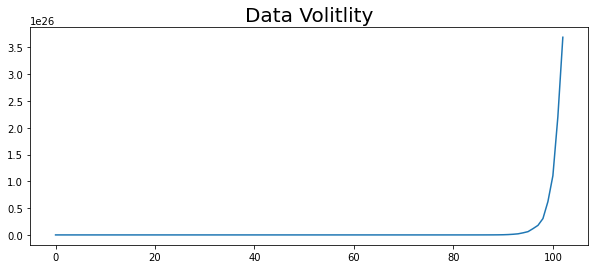

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volitlity',fontsize=20)

**This indicates that there is no volatility in the dataset                    So, we cannot apply ARCH or GARCH**

In [ ]:
from arch.__future__ import reindexing
rolling_predictions=[]
test_size=100
for i in range(test_size):
  train = Xt[:-(test_size-i)]
  model=arch_model(train,p=3,q=3)
  model_fit=model.fit(disp='off')
  pred=model_fit.forecast(horizon=1)
  rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
  

In [ ]:
rolling_predictions=pd.Series(rolling_predictions)

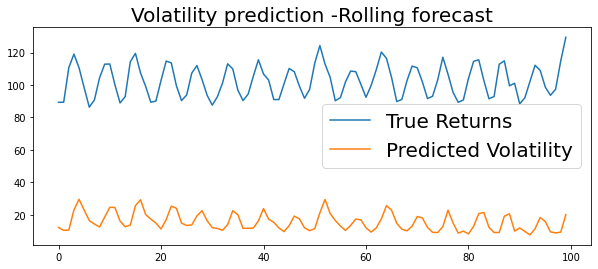

In [ ]:
plt.figure(figsize=(10,4))
true,=plt.plot(Xt[-100:])

preds,=plt.plot(rolling_predictions)
plt.title('Volatility prediction -Rolling forecast',fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'],fontsize=20)